In [1275]:
# 20CS30028 : Kriti Bhardwaj
# Project code : PLHC-DC
# Project Title : Premier League Player Rating using Complete Linkage Divisive (Top-Down)
# Clustering Technique

In [1276]:
import pandas as pd
import numpy as np
import random

In [1277]:
players = pd.read_csv("ipl.csv")

In [1278]:
players

,PLAYER,Mat.x,Inns.x,NO,Runs.x,HS,Avg.x,BF,SR.x,X100,...,Ov,Runs.y,Wkts,BBI,Avg.y,Econ,SR.y,X4w,X5w,y
0,Aaron Finch,10,9,1,134,46,16.75,100,134.00,0,...,0.0,0,0,0,0,0.00,0,0,0,0
1,AB de Villiers,12,11,2,480,90,53.33,275,174.54,0,...,0.0,0,0,0,0,0.00,0,0,0,0
2,Abhishek Sharma,3,3,2,63,46,63,33,190.90,0,...,0.0,0,0,0,0,0.00,0,0,0,0
3,Ajinkya Rahane,15,14,1,370,65,28.46,313,118.21,0,...,0.0,0,0,0,0,0.00,0,0,0,0
4,Alex Hales,6,6,0,148,45,24.66,118,125.42,0,...,0.0,0,0,0,0,0.00,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,Siddarth Kaul,0,0,0,0,0,0,0,0.00,0,...,66.0,547,21,0,26.04,8.28,18.85,0,0,0
139,Trent Boult,0,0,0,0,0,0,0,0.00,0,...,52.4,466,18,0,25.88,8.84,17.55,0,0,0
140,Umesh Yadav,0,0,0,0,0,0,0,0.00,0,...,53.1,418,20,0,20.9,7.86,15.95,0,0,0
141,Vi0y Kumar,0,0,0,0,0,0,0,0.00,0,...,3.5,65,2,0,32.5,16.95,11.5,0,0,0


## DATA PREPROCESSING

In [1279]:
features = players.columns.tolist()

In [1280]:
features.remove('PLAYER')

In [1281]:
players = players.apply(pd.to_numeric, errors='coerce').astype(float)
players.replace('-', np.nan)

# fill missing values in all columns with their respective means
for column in players.columns:
    players[column] = players[column].fillna(players[column].mean())
    
print(players)

     PLAYER  Mat.x  Inns.x   NO  Runs.x    HS  Avg.x     BF    SR.x  X100  \
0       NaN   10.0     9.0  1.0   134.0  46.0  16.75  100.0  134.00   0.0   
1       NaN   12.0    11.0  2.0   480.0  90.0  53.33  275.0  174.54   0.0   
2       NaN    3.0     3.0  2.0    63.0  46.0  63.00   33.0  190.90   0.0   
3       NaN   15.0    14.0  1.0   370.0  65.0  28.46  313.0  118.21   0.0   
4       NaN    6.0     6.0  0.0   148.0  45.0  24.66  118.0  125.42   0.0   
..      ...    ...     ...  ...     ...   ...    ...    ...     ...   ...   
138     NaN    0.0     0.0  0.0     0.0   0.0   0.00    0.0    0.00   0.0   
139     NaN    0.0     0.0  0.0     0.0   0.0   0.00    0.0    0.00   0.0   
140     NaN    0.0     0.0  0.0     0.0   0.0   0.00    0.0    0.00   0.0   
141     NaN    0.0     0.0  0.0     0.0   0.0   0.00    0.0    0.00   0.0   
142     NaN    0.0     0.0  0.0     0.0   0.0   0.00    0.0    0.00   0.0   

     ...    Ov  Runs.y  Wkts  BBI  Avg.y   Econ   SR.y  X4w  X5w    y  
0  

In [1282]:
players = players.dropna(subset=features)

In [1283]:
players

,PLAYER,Mat.x,Inns.x,NO,Runs.x,HS,Avg.x,BF,SR.x,X100,...,Ov,Runs.y,Wkts,BBI,Avg.y,Econ,SR.y,X4w,X5w,y
0,NaN,10.0,9.0,1.0,134.0,46.0,16.75,100.0,134.00,0.0,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0
1,NaN,12.0,11.0,2.0,480.0,90.0,53.33,275.0,174.54,0.0,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0
2,NaN,3.0,3.0,2.0,63.0,46.0,63.00,33.0,190.90,0.0,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0
3,NaN,15.0,14.0,1.0,370.0,65.0,28.46,313.0,118.21,0.0,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0
4,NaN,6.0,6.0,0.0,148.0,45.0,24.66,118.0,125.42,0.0,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,NaN,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,...,66.0,547.0,21.0,0.0,26.04,8.28,18.85,0.0,0.0,0.0
139,NaN,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,...,52.4,466.0,18.0,0.0,25.88,8.84,17.55,0.0,0.0,0.0
140,NaN,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,...,53.1,418.0,20.0,0.0,20.90,7.86,15.95,0.0,0.0,0.0
141,NaN,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,...,3.5,65.0,2.0,0.0,32.50,16.95,11.50,0.0,0.0,0.0


In [1284]:
data = players[features].copy()

In [1285]:
data

,Mat.x,Inns.x,NO,Runs.x,HS,Avg.x,BF,SR.x,X100,X50,...,Ov,Runs.y,Wkts,BBI,Avg.y,Econ,SR.y,X4w,X5w,y
0,10.0,9.0,1.0,134.0,46.0,16.75,100.0,134.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0
1,12.0,11.0,2.0,480.0,90.0,53.33,275.0,174.54,0.0,6.0,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0
2,3.0,3.0,2.0,63.0,46.0,63.00,33.0,190.90,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0
3,15.0,14.0,1.0,370.0,65.0,28.46,313.0,118.21,0.0,1.0,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0
4,6.0,6.0,0.0,148.0,45.0,24.66,118.0,125.42,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,...,66.0,547.0,21.0,0.0,26.04,8.28,18.85,0.0,0.0,0.0
139,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,...,52.4,466.0,18.0,0.0,25.88,8.84,17.55,0.0,0.0,0.0
140,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,...,53.1,418.0,20.0,0.0,20.90,7.86,15.95,0.0,0.0,0.0
141,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,...,3.5,65.0,2.0,0.0,32.50,16.95,11.50,0.0,0.0,0.0


## STEP 1
1. Scale the data
2. Initialize random centroids
3. Label each data point
4. Update centroids
5. Converge

In [1286]:
data = data.apply(pd.to_numeric)

In [1287]:
data = ((data - data.min()) / (data.max() - data.min())) * 9 + 1

In [1288]:
data

,Mat.x,Inns.x,NO,Runs.x,HS,Avg.x,BF,SR.x,X100,X50,...,Ov,Runs.y,Wkts,BBI,Avg.y,Econ,SR.y,X4w,X5w,y
0,6.294118,5.764706,2.0,2.640816,4.234375,2.987999,2.744186,5.0200,1.0,1.000,...,1.000000,1.000000,1.000,NaN,1.000000,1.000000,1.000000,1.0,1.0,NaN
1,7.352941,6.823529,3.0,6.877551,7.328125,7.329553,5.796512,6.2362,1.0,7.750,...,1.000000,1.000000,1.000,NaN,1.000000,1.000000,1.000000,1.0,1.0,NaN
2,2.588235,2.588235,3.0,1.771429,4.234375,8.477252,1.575581,6.7270,1.0,1.000,...,1.000000,1.000000,1.000,NaN,1.000000,1.000000,1.000000,1.0,1.0,NaN
3,8.941176,8.411765,2.0,5.530612,5.570312,4.377819,6.459302,4.5463,1.0,2.125,...,1.000000,1.000000,1.000,NaN,1.000000,1.000000,1.000000,1.0,1.0,NaN
4,4.176471,4.176471,1.0,2.812245,4.164062,3.926810,3.058140,4.7626,1.0,1.000,...,1.000000,1.000000,1.000,NaN,1.000000,1.000000,1.000000,1.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.0000,1.0,1.000,...,9.735294,10.000000,8.875,NaN,3.170000,5.396460,3.692857,1.0,1.0,NaN
139,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.0000,1.0,1.000,...,7.935294,8.667276,7.750,NaN,3.156667,5.693805,3.507143,1.0,1.0,NaN
140,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.0000,1.0,1.000,...,8.027941,7.877514,8.500,NaN,2.741667,5.173451,3.278571,1.0,1.0,NaN
141,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.0000,1.0,1.000,...,1.463235,2.069470,1.750,NaN,3.708333,10.000000,2.642857,1.0,1.0,NaN


In [1289]:
data = data.drop(['BBI', 'y'], axis=1)

In [1290]:
data.describe()

,Mat.x,Inns.x,NO,Runs.x,HS,Avg.x,BF,SR.x,X100,X50,...,Mat.y,Inns.y,Ov,Runs.y,Wkts,Avg.y,Econ,SR.y,X4w,X5w
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,...,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,4.857672,4.183875,2.251748,2.620608,3.331130,3.066205,2.657465,3.793608,1.157343,1.794580,...,3.969148,3.650761,3.123941,3.257910,2.736014,2.813276,4.269905,3.063560,1.167832,1.062937
std,3.217602,2.911247,1.629259,2.148762,2.247868,1.992965,2.098028,2.016085,0.986564,1.628815,...,2.986909,2.852005,2.490909,2.528272,2.216153,1.682893,2.484765,1.825415,0.926800,0.752618
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,4.705882,3.647059,2.000000,1.636735,2.898438,2.858631,1.715116,4.510600,1.000000,1.000000,...,3.117647,2.588235,1.926471,2.349177,1.750000,2.813276,5.173451,3.063560,1.000000,1.000000
75%,7.882353,6.823529,3.000000,3.473469,4.761719,4.074575,3.659884,5.217850,1.000000,2.125000,...,6.294118,5.500000,4.705882,5.006399,3.812500,3.652500,6.044248,4.168571,1.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [1291]:
def random_centroids(data, k):
    centroids = []
    centroids = data.sample(n=k)
    centroids = centroids.T
    return centroids

In [1294]:
def cosine_similarity(a, b):
    dot_product = np.dot(a, b)
    norm_a = np.linalg.norm(a)
    norm_b = np.linalg.norm(b)
    return dot_product / (norm_a * norm_b)

In [1295]:
def get_labels(data, centroids):
    similarity = centroids.apply(lambda x: cosine_similarity(data, x))
    return similarity.idxmax(axis=1)

In [1299]:
def new_centroids(data, labels, k):
    return data.groupby(labels).apply(lambda x: np.mean(x)).T

In [1300]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [1301]:
def plot_clusters(data, labels, centroids, iteration):
    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(data)
    centroids_2d = pca.fit_transform(centroids.T)
    clear_output(wait=True)
    plt.title(f'Iteration {iteration+1}')
    plt.scatter(x=data_2d[:,0], y=data_2d[:,1], c=labels)
    plt.scatter(x=centroids_2d[:,0], y=centroids_2d[:,1])
    plt.show()
    

In [1302]:
global labels

In [1303]:
def k_means_clustering(data, k, max_iterations):
    centroids = random_centroids(data, k)
    iteration = 0

    while iteration < max_iterations :
        labels = get_labels(data, centroids)
        centroids = new_centroids(data, labels, k)
        plot_clusters(data, labels, centroids, iteration)
        iteration += 1

    cluster = {}
    
    for i in centroids:
        key = f'{i}'
        cluster[key] = []
        
    index = 0
    for x in labels:
        cluster[f'{x}'].append(index)
        index += 1
        
    for i in centroids:
        key = f'{i}'
        print(cluster[key])
        print("\n")
        
        
    return labels

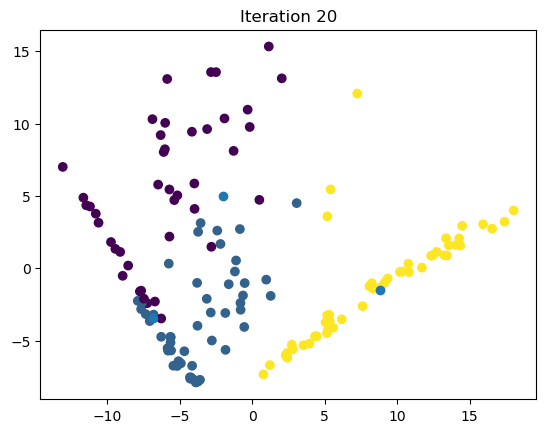

[6, 7, 10, 11, 24, 27, 31, 32, 33, 38, 39, 46, 47, 56, 60, 64, 67, 69, 70, 71, 79, 81, 83, 85, 89, 101, 102, 108, 114, 115, 121, 124, 126, 128, 129, 131, 134, 136, 138, 139, 140, 142]


[8, 9, 13, 16, 17, 18, 20, 21, 22, 25, 34, 41, 49, 53, 54, 57, 58, 59, 88, 92, 93, 94, 96, 99, 100, 103, 104, 105, 106, 107, 109, 110, 111, 112, 113, 116, 117, 118, 119, 120, 122, 123, 125, 127, 130, 132, 133, 135, 137, 141]


[0, 1, 2, 3, 4, 5, 12, 14, 15, 19, 23, 26, 28, 29, 30, 35, 36, 37, 40, 42, 43, 44, 45, 48, 50, 51, 52, 55, 61, 62, 63, 65, 66, 68, 72, 73, 74, 75, 76, 77, 78, 80, 82, 84, 86, 87, 90, 91, 95, 97, 98]




0      91
1      91
2      91
3      91
4      91
       ..
138    56
139    56
140    56
141    67
142    56
Length: 143, dtype: int64

In [1304]:
k_means_clustering(data, 3, 20)

## STEP 2

In [1305]:
def silhouette_coefficient(data, labels):
    n_samples = len(data)
    a = np.zeros(n_samples)
    b = np.zeros(n_samples)
    s = np.zeros(n_samples)
    
    for i in range(n_samples):
        
        # calculating a[i]
        a_j = []
        for j in range(n_samples):
            if labels[i]==labels[j] and not i==j :
                a_j.append(cosine_similarity(data.iloc[i], data.iloc[j]))
#                 a_j.append(np.linalg.norm(data.iloc[i] - data.iloc[j]))
            
        a[i] = np.mean(a_j)
        
        
        iteration = 0
        for label in set(labels):
            b_j = []
            if not labels[i]==label:
                for j in range(n_samples):
                    if labels[j]==label and not i==j :
                        b_j.append(cosine_similarity(data.iloc[i], data.iloc[j]))
                        
                if iteration==0 :
                    b[i] = np.mean(b_j)
                else:
                    if np.mean(b_j) > b[i] : 
                        b[i] = np.mean(b_j)
            
                iteration += 1
                
                
        s[i] = (b[i]-a[i]) / max(a[i], b[i]) if max(a[i], b[i]) != 0 else 0
    
    return np.mean(s)

In [1306]:
silhouette_coefficient(data, labels)

-0.07118648464542321

## STEP 3

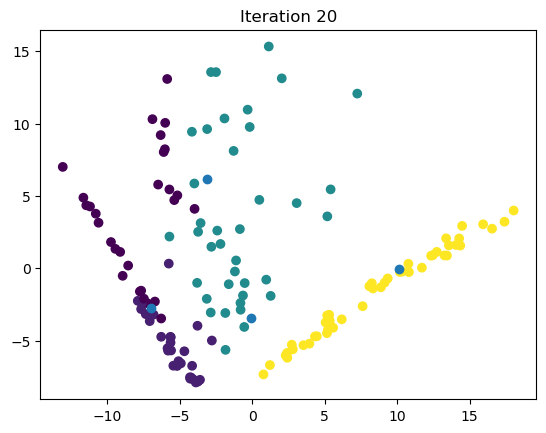

[7, 11, 32, 38, 39, 56, 60, 64, 69, 81, 85, 101, 102, 108, 114, 115, 121, 124, 126, 128, 129, 131, 134, 136, 138, 139, 140, 142]


[20, 57, 59, 100, 103, 104, 105, 106, 107, 109, 110, 111, 112, 113, 116, 117, 118, 119, 120, 122, 123, 125, 127, 130, 132, 133, 135, 137, 141]


[6, 8, 9, 10, 13, 16, 17, 18, 21, 22, 24, 25, 27, 31, 33, 34, 41, 46, 47, 49, 53, 54, 58, 62, 67, 70, 71, 79, 80, 83, 88, 89, 92, 93, 94, 96, 98, 99]


[0, 1, 2, 3, 4, 5, 12, 14, 15, 19, 23, 26, 28, 29, 30, 35, 36, 37, 40, 42, 43, 44, 45, 48, 50, 51, 52, 55, 61, 63, 65, 66, 68, 72, 73, 74, 75, 76, 77, 78, 82, 84, 86, 87, 90, 91, 95, 97]




0      30
1      30
2      30
3      30
4      30
       ..
138     7
139     7
140     7
141     9
142     7
Length: 143, dtype: int64

In [1307]:
k_means_clustering(data, 4, 20)

In [1308]:
silhouette_coefficient(data, labels)

-0.07118648464542321

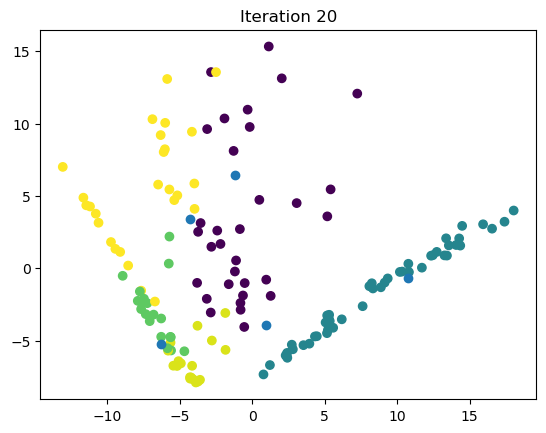

[6, 8, 9, 10, 13, 16, 17, 18, 21, 22, 25, 27, 31, 33, 34, 41, 46, 47, 53, 54, 58, 62, 67, 71, 80, 89, 92, 93, 94, 96, 98, 99]


[0, 1, 2, 3, 4, 5, 12, 14, 15, 19, 23, 26, 28, 29, 30, 35, 36, 37, 40, 42, 43, 44, 45, 48, 50, 51, 52, 55, 61, 63, 65, 66, 68, 72, 73, 74, 75, 76, 77, 78, 82, 84, 86, 87, 90, 91, 95, 97]


[57, 83, 105, 106, 108, 109, 111, 112, 113, 114, 118, 122, 123, 127, 128, 131, 134, 135, 137]


[20, 49, 59, 88, 100, 103, 104, 107, 110, 116, 117, 119, 120, 125, 130, 132, 133, 141]


[7, 11, 24, 32, 38, 39, 56, 60, 64, 69, 70, 79, 81, 85, 101, 102, 115, 121, 124, 126, 129, 136, 138, 139, 140, 142]




0       76
1       76
2       76
3       76
4       76
      ... 
138    142
139    142
140    142
141    135
142    142
Length: 143, dtype: int64

In [1309]:
k_means_clustering(data, 5, 20)

In [1310]:
silhouette_coefficient(data, labels)

-0.07118648464542321

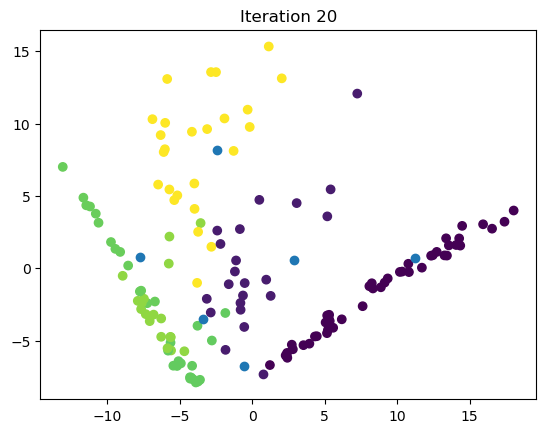

[0, 1, 2, 3, 4, 5, 12, 14, 15, 19, 23, 26, 28, 29, 30, 35, 36, 37, 40, 42, 43, 45, 48, 50, 51, 52, 55, 61, 63, 65, 66, 68, 72, 73, 74, 75, 76, 77, 78, 82, 84, 86, 87, 90, 91, 95, 97]


[9, 13, 16, 18, 21, 22, 25, 31, 34, 41, 44, 49, 53, 54, 58, 62, 80, 93, 94, 96, 98, 99]


[20, 59, 88, 100, 103, 104, 107, 110, 116, 117, 119, 120, 125, 130, 132, 133, 141]


[101, 102, 108, 115, 121, 124, 126, 129, 134, 136, 138, 139, 140, 142]


[8, 57, 83, 105, 106, 109, 111, 112, 113, 114, 118, 122, 123, 127, 128, 131, 135, 137]


[6, 7, 10, 11, 17, 24, 27, 32, 33, 38, 39, 46, 47, 56, 60, 64, 67, 69, 70, 71, 79, 81, 85, 89, 92]




0       47
1       47
2       47
3       47
4       47
      ... 
138    108
139    108
140    108
141    107
142    108
Length: 143, dtype: int64

In [1311]:
k_means_clustering(data, 6, 20)

In [1312]:
silhouette_coefficient(data, labels)

-0.07118648464542321

## STEP 4


In [1313]:
def complete_linkage_divisive_clustering(data, k):
    # initialize with all data in one cluster
    clusters = [data.index.to_list()]
    while len(clusters) < k:
        # find the cluster with the largest maximum distance between points i.e minimum cosine_similarity
        min_d = float("inf")
        min_cluster = None
        for c in clusters:
            d = np.min([np.min([cosine_similarity(data.iloc[i], data.iloc[j]) for j in c if i != j]) for i in c])
            if d < min_d:
                min_d = d
                min_cluster = c
        # split the selected cluster into two
        cluster1 = []
        cluster2 = []
        for i in min_cluster:
            if len(cluster1) == 0:
                cluster1.append(i)
            elif len(cluster2) == 0:
                cluster2.append(i)
            else:
                if np.mean([cosine_similarity(data.iloc[i], data.iloc[j]) for j in cluster1]) < np.mean([cosine_similarity(data.iloc[i], data.iloc[j]) for j in cluster2]):
                    cluster1.append(i)
                else:
                    cluster2.append(i)
        # remove the original cluster and add the two new clusters
        clusters.remove(min_cluster)
        clusters.append(cluster1)
        clusters.append(cluster2)
        
    for cl in clusters:
        print(cl)
        print("\n")
        


In [1314]:
complete_linkage_divisive_clustering(data, 3)

[0, 10, 34, 40, 41, 55, 56, 58, 61, 69, 72, 73, 77, 79, 80, 81, 82, 83, 84, 86, 87, 88, 89, 92, 94, 95, 96, 97, 99, 102, 103, 106, 110, 113, 118, 121, 122, 128, 132, 134, 139]


[1, 6, 11, 12, 20, 21, 23, 30, 33, 51, 57, 62, 63, 71, 75, 104, 109, 115, 119, 129, 133, 140]


[2, 3, 4, 5, 7, 8, 9, 13, 14, 15, 16, 17, 18, 19, 22, 24, 25, 26, 27, 28, 29, 31, 32, 35, 36, 37, 38, 39, 42, 43, 44, 45, 46, 47, 48, 49, 50, 52, 53, 54, 59, 60, 64, 65, 66, 67, 68, 70, 74, 76, 78, 85, 90, 91, 93, 98, 100, 101, 105, 107, 108, 111, 112, 114, 116, 117, 120, 123, 124, 125, 126, 127, 130, 131, 135, 136, 137, 138, 141, 142]




In [1315]:
complete_linkage_divisive_clustering(data, 4)

[0, 10, 34, 40, 41, 55, 56, 58, 61, 69, 72, 73, 77, 79, 80, 81, 82, 83, 84, 86, 87, 88, 89, 92, 94, 95, 96, 97, 99, 102, 103, 106, 110, 113, 118, 121, 122, 128, 132, 134, 139]


[1, 6, 11, 12, 20, 21, 23, 30, 33, 51, 57, 62, 63, 71, 75, 104, 109, 115, 119, 129, 133, 140]


[2, 4, 5, 7, 9, 15, 16, 17, 18, 19, 24, 25, 26, 27, 28, 29, 31, 32, 35, 37, 39, 42, 45, 47, 48, 49, 50, 52, 53, 54, 59, 60, 64, 65, 66, 67, 68, 70, 74, 76, 78, 85, 90, 100, 101, 107, 108, 111, 112, 116, 117, 120, 123, 126, 127, 130, 131, 135, 137, 138, 142]


[3, 8, 13, 14, 22, 36, 38, 43, 44, 46, 91, 93, 98, 105, 114, 124, 125, 136, 141]




In [1316]:
complete_linkage_divisive_clustering(data, 5)

[0, 10, 34, 40, 41, 55, 56, 58, 61, 69, 72, 73, 77, 79, 80, 81, 82, 83, 84, 86, 87, 88, 89, 92, 94, 95, 96, 97, 99, 102, 103, 106, 110, 113, 118, 121, 122, 128, 132, 134, 139]


[1, 6, 11, 12, 20, 21, 23, 30, 33, 51, 57, 62, 63, 71, 75, 104, 109, 115, 119, 129, 133, 140]


[3, 8, 13, 14, 22, 36, 38, 43, 44, 46, 91, 93, 98, 105, 114, 124, 125, 136, 141]


[2, 5, 7, 9, 15, 16, 18, 19, 24, 25, 26, 27, 28, 29, 31, 32, 35, 37, 39, 45, 48, 49, 52, 53, 59, 60, 64, 65, 66, 67, 68, 70, 74, 76, 78, 85, 90, 100, 101, 107, 108, 112, 116, 117, 120, 123, 126, 127, 130, 135, 137, 138, 142]


[4, 17, 42, 47, 50, 54, 111, 131]




In [1317]:
complete_linkage_divisive_clustering(data, 6)

[0, 10, 34, 40, 41, 55, 56, 58, 61, 69, 72, 73, 77, 79, 80, 81, 82, 83, 84, 86, 87, 88, 89, 92, 94, 95, 96, 97, 99, 102, 103, 106, 110, 113, 118, 121, 122, 128, 132, 134, 139]


[1, 6, 11, 12, 20, 21, 23, 30, 33, 51, 57, 62, 63, 71, 75, 104, 109, 115, 119, 129, 133, 140]


[3, 8, 13, 14, 22, 36, 38, 43, 44, 46, 91, 93, 98, 105, 114, 124, 125, 136, 141]


[4, 17, 42, 47, 50, 54, 111, 131]


[2, 18, 26, 27, 31, 48, 49, 52, 59, 60, 64, 65, 66, 67, 68, 76, 85, 90, 101, 108, 116, 117, 126, 127, 137]


[5, 7, 9, 15, 16, 19, 24, 25, 28, 29, 32, 35, 37, 39, 45, 53, 70, 74, 78, 100, 107, 112, 120, 123, 130, 135, 138, 142]




In [1318]:
def jaccard_coefficient(set1: Set, set2: Set) -> float:
    intersection_size = len(set1.intersection(set2))
    union_size = len(set1.union(set2))
    if union_size == 0:
        return 0.0
    else:
        return intersection_size / union_size

## COMPUTING JACCARD SIMILARITY FOR k = 6

In [1319]:
list1 = [{8, 9, 13, 16, 18, 20, 22, 34, 49, 54, 57, 58, 59, 92, 96}, 
         {21, 25, 41, 53, 62, 80, 88, 94, 98, 99}, 
         {6, 7, 10, 11, 17, 24, 27, 31, 32, 33, 38, 39, 46, 47, 56, 60, 64, 67, 69, 70, 71, 79, 81, 83, 85, 89}, 
         {0, 1, 2, 3, 4, 5, 12, 14, 15, 19, 23, 26, 28, 29, 30, 35, 36, 37, 40, 42, 43, 44, 45, 48, 50, 51, 52, 55, 61, 63, 65, 66, 68, 72, 73, 74, 75, 76, 77, 78, 82, 84, 86, 87, 90, 91, 95, 97}, 
         {101, 102, 108, 114, 115, 121, 124, 126, 128, 129, 131, 134, 136, 138, 139, 140, 142}, 
         {93, 100, 103, 104, 105, 106, 107, 109, 110, 111, 112, 113, 116, 117, 118, 119, 120, 122, 123, 125, 127, 130, 132, 133, 135, 137, 141}]

list2 = [{0, 10, 34, 40, 41, 55, 56, 58, 61, 69, 72, 73, 77, 79, 80, 81, 82, 83, 84, 86, 88, 89, 90, 92, 94, 95, 96, 106, 111, 115, 116, 122, 127, 131, 134, 140, 141}, 
         {1, 6, 11, 12, 20, 21, 23, 30, 33, 51, 57, 62, 63, 71, 75, 97, 100, 102, 107, 112, 119, 124, 129, 133, 139},
         {3, 8, 13, 14, 22, 35, 38, 42, 44, 46, 48, 53, 60, 65, 67, 68, 70, 74, 98, 103, 108, 113, 118, 125, 128, 136}, 
         {4, 17, 43, 54, 105, 130}, 
         {2, 18, 27, 28, 31, 50, 78, 85, 91, 99, 109, 120, 126, 142}, 
         {5, 7, 9, 15, 16, 19, 24, 25, 26, 29, 32, 36, 37, 39, 45, 47, 49, 52, 59, 64, 66, 76, 87, 93, 101, 104, 110, 114, 117, 121, 123, 132, 135, 137, 138}]

jaccard_coeffs = []
for i in range(len(list1)):
        jaccard_coeff = jaccard_coefficient(list1[i], list2[i])
        jaccard_coeffs.append(jaccard_coeff)
        
print(jaccard_coeffs) 

[0.08333333333333333, 0.06060606060606061, 0.10638297872340426, 0.038461538461538464, 0.06896551724137931, 0.14814814814814814]
